In [6]:




import numpy as np
from numpy import linalg as la 
import matplotlib.pyplot as plt
import sys
import random


func = lambda x: max(x,0.0)

func = np.vectorize(func)

def d_func(x):
    dx = x
    dx[x<0.0] = 0
    dx[x>=0.0] = 1
    return dx



def backpropagation(I, y, w1, w2):
    H_unac = np.dot(w1,I) 
    H = func(H_unac)
    O_unac = np.dot(w2,H)
    O = func(O_unac)

    error = O - y
    alpha = error*d_func(O_unac)
    
    
    grad = np.transpose(np.multiply(alpha , H)) 
    
    erro_h = np.dot(np.transpose(w2), alpha)
    
    alpha_h = np.multiply(erro_h, d_func(H_unac))
    
    grad_h = np.multiply(alpha_h, np.transpose(np.tile(I, (1, 2))))

    return grad, grad_h


def feedforward(I,w1,w2):
    H_unac = np.dot(w1,I) # unac indica que é a versao não ativada da camada
    H = func(H_unac)
    O_unac = np.dot(w2,H)
    O = func(O_unac)
    return O





#erro quadrático (funcao a ser minimizada)
def eq(x,y,w1,w2):
    parte_1 = (feedforward(x[0],w1,w2) - y[0])**2
    parte_2 = (feedforward(x[1],w1,w2) - y[1])**2
    parte_3 = (feedforward(x[2],w1,w2) - y[2])**2
    parte_4 = (feedforward(x[3],w1,w2) - y[3])**2
    parte_5 = (feedforward(x[4],w1,w2) - y[4])**2

    return parte_1 + parte_2 + parte_3 + parte_4 + parte_5


#funcao que calcula o gradiente da funcao de erro quadratico
def grad_f(x,y,w1,w2,batch_size):
  temp_grad = 0
  temp_grad_h = 0
  indices = random.sample(range(0, len(x)), batch_size)
  for i in range(batch_size):
    temp_grad, temp_grad_h =  backpropagation(x[indices[i]],y[indices[i]], w1, w2)
    if(i==0):
      grad = temp_grad
      grad_h = temp_grad_h
    else:
      grad = grad + temp_grad
      grad_h = grad_h + temp_grad_h
  grad = grad/batch_size
  grad_h = grad_h/batch_size
  return grad, grad_h



def Adagrad(X, y, t, batch_size = 5):

    # w1 e w2 são matrizes com os pesos da rede neural
    w1 = np.matrix([[1],[2]])
    w2 = np.matrix([3,4])

    n_iter = 0
    erro_quad = 0
    a_history = []
    b_history = []

    while True:
        
        #descobre o gradiente
        grad, grad_h = grad_f(X, y, w1, w2, batch_size)
        
        print('gd:', grad)


        #=========== apenas para plotar o erro==========
        a = n_iter
        a_history.append(a)
        erro_quad = eq(X,y,w1,w2)
        b = erro_quad 
        b_history.append(b)
        #===============================================
        

        #anda com passo t na direção oposta à do gradiente
        w1 = w1 - np.multiply(t, grad_h)
        w2 = w2 - np.multiply(t, grad)        
        
        #norma do gradiente (usado como medida de errosi)
        norm_grad = la.norm(np.matrix([[grad_h[0,0]],[grad_h[1,0]],[grad[0,0]],[grad[0,1]]]))

        
        #condição de parada
        if(norm_grad < 0.0001):
          break

        n_iter = n_iter + 1


#=============== plotando resultados ====================

    # m ideal por quadrados mínimos : 4.09
    m = (w1[0,0]*w2[0,0] + w1[1,0]*w2[0,1])
    print('m: ',  m)
    print('n_iter', n_iter)

    ex = np.linspace(0,6,10)
    ey = m*ex

    plt.axis([0,6,0,30])
    plt.scatter(X,[1,4,9,16,25],s = 30, c = "red")

    plt.plot(ex,ey)
    plt.show()

    plt.scatter(a_history,b_history)
    plt.show()
#========================================================


#aqui temos os dados para treinamento

X = [np.transpose(np.matrix([1])),
     np.transpose(np.matrix([2])),
     np.transpose(np.matrix([3])),
     np.transpose(np.matrix([4])),
     np.transpose(np.matrix([5]))
     ]

y = [1,4,9,16,25]


m:  4.0909105238311225
n_iter 54


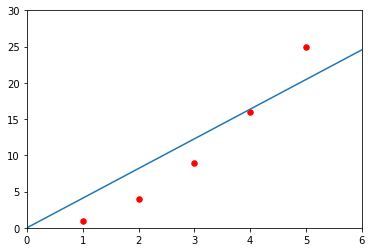

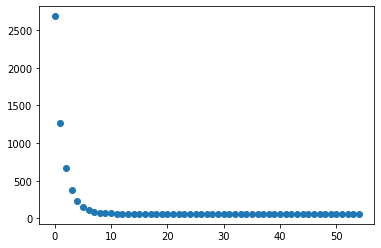

In [2]:
Adagrad(X, y, 0.001, 5)


NameError: name 'grad' is not defined